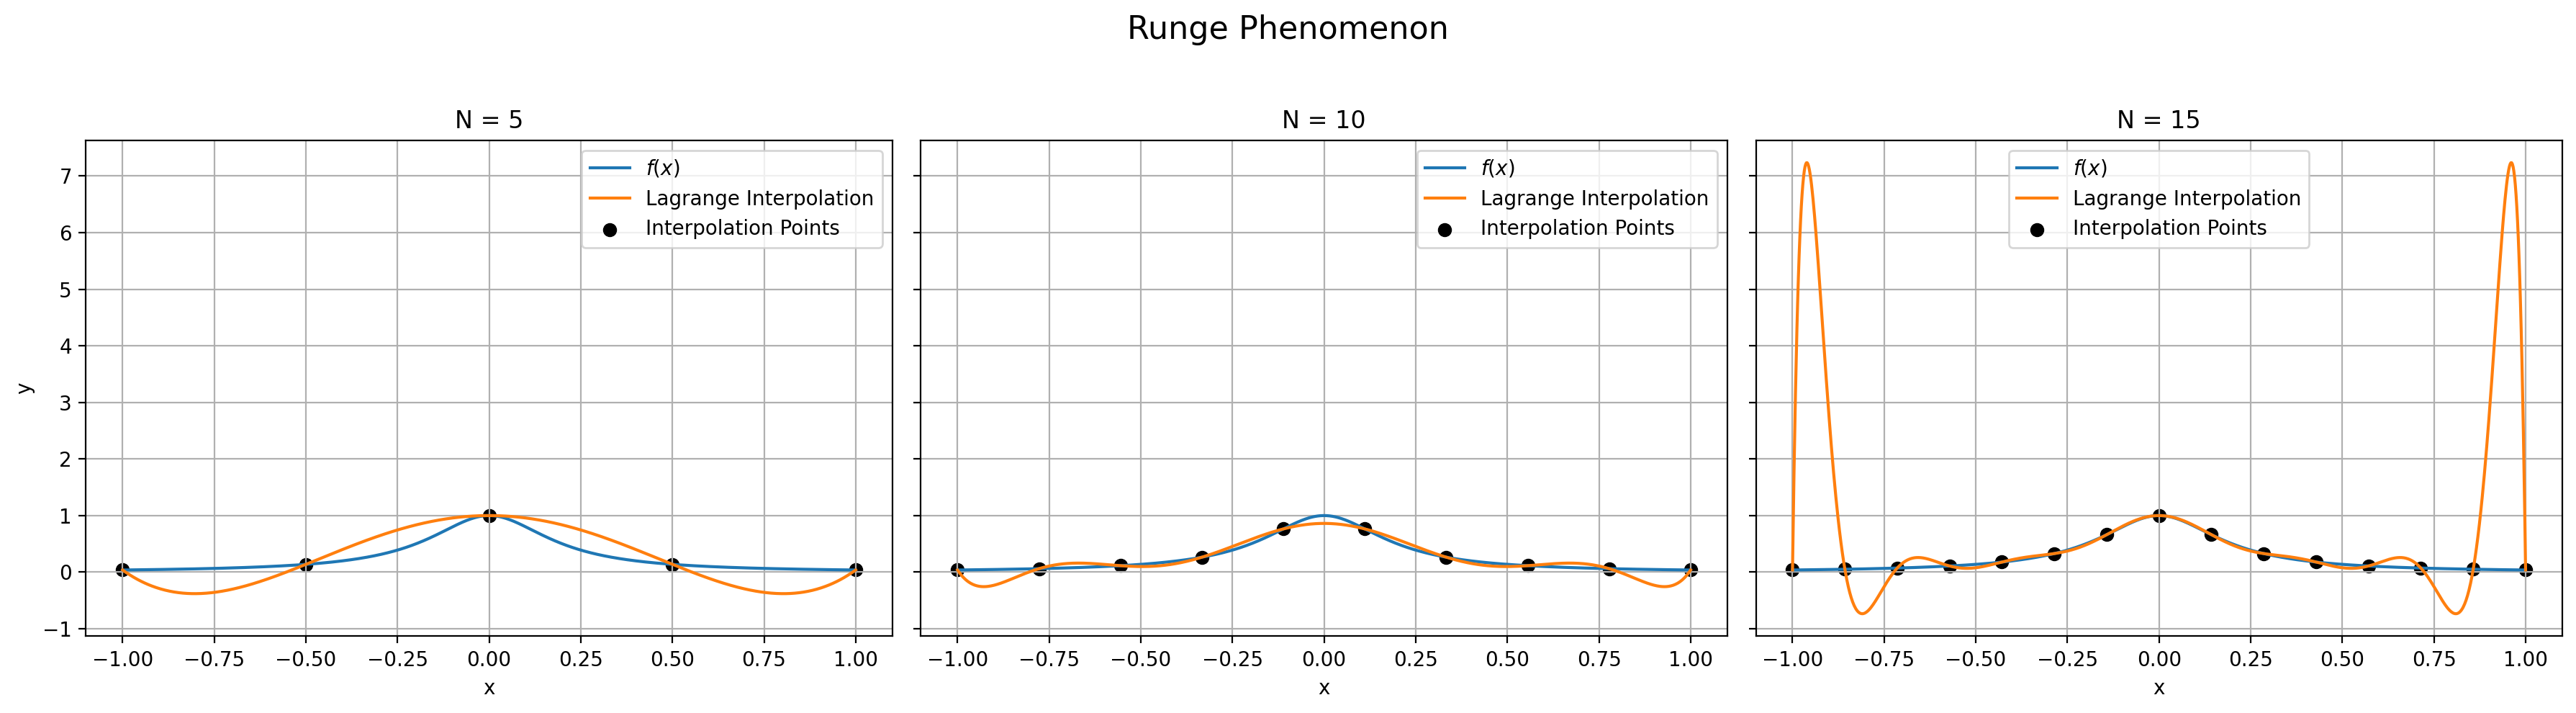

In [6]:
%config InlineBackend.figure_format = 'retina'
# Runge phenomenon

import numpy as np
import matplotlib.pyplot as plt

# Function to interpolate
def f(x):
    return 1 / (1 + 25 * x**2)

# Lagrange interpolation
def lagrange_interpolation(x, y, x_new):
    """
    Perform Lagrange interpolation.
    
    Parameters:
    x : array_like
        Known x values.
    y : array_like
        Known y values.
    x_new : array_like
        New x values to interpolate.
    
    Returns:
    y_new : array_like
        Interpolated y values at x_new.
    """
    n = len(x)
    y_new = np.zeros_like(x_new)

    for i in range(n):
        L = np.ones_like(x_new)
        for j in range(n):
            if i != j:
                L *= (x_new - x[j]) / (x[i] - x[j])
        y_new += y[i] * L

    return y_new

# 画三个子图，分别对应N=5,10,15
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
N_list = [5, 10, 15]
x_new = np.linspace(-1, 1, 1000)

for ax, N in zip(axes, N_list):
    x = np.linspace(-1, 1, N)
    y = f(x)
    y_new = lagrange_interpolation(x, y, x_new)
    ax.plot(x_new, f(x_new), label='$f(x)$')
    ax.plot(x_new, y_new, label='Lagrange Interpolation')
    ax.scatter(x, y, color='black', label='Interpolation Points')
    ax.set_title(f'N = {N}')
    ax.set_xlabel('x')
    ax.grid()
    if ax is axes[0]:
        ax.set_ylabel('y')
    ax.legend()

fig.suptitle('Runge Phenomenon', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
